In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Restaurant_Reviews.csv")

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [10]:
# !conda install nltk --yes
# !conda install -c conda-forge wordcloud --yes
# !conda install -c anaconda scikit-learn --yes

Solving environment: done

## Package Plan ##

  environment location: /home/animesh/miniconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.01.10 |       h06a4308_0         127 KB  anaconda
    certifi-2022.12.7          |  py310h06a4308_0         151 KB  anaconda
    scikit-learn-1.2.0         |  py310h6a678d5_1         9.0 MB  anaconda
    threadpoolctl-2.2.0        |     pyh0d69192_0          16 KB  anaconda
    ------------------------------------------------------------
                                           Total:         9.3 MB

The following NEW packages will be INSTALLED:

  scikit-learn       anaconda/linux-64::scikit-learn-1.2.0-py310h6a678d5_1 
  threadpoolctl      anaconda/noarch::threadpoolctl-2.2.0-pyh0d69192_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certific

 In Python, `re` stands for "Regular Expressions." It is a built-in module that provides support for regular expressions. Regular expressions are powerful tools for pattern matching and text manipulation. The re module allows you to work with regular expressions in Python, enabling you to search for patterns within strings, replace text based on patterns, and more.

#### Here's a brief overview of some commonly used functions and methods in the re module:
1. `re.compile(pattern)`: Compiles a regular expression pattern into a regex object for efficient use in matching and searching.
1. `re.search(pattern, string)`: Searches for the first occurrence of the pattern in the given string and returns a match object if found.
1. `re.match(pattern, string)`: Matches the pattern only at the beginning of the string and returns a match object if it's a match.
1. `re.findall(pattern, string)`: Returns all non-overlapping matches of the pattern in the string as a list of strings.
1. `re.finditer(pattern, string)`: Returns an iterator yielding match objects for all non-overlapping matches of the pattern in the string.
1. `re.sub(pattern, replacement, string)`: Replaces all occurrences of the pattern in the string with the specified replacement.

1. `nltk.download('stopwords')`: This line is used to download the NLTK stopwords dataset. Stopwords are common words (e.g., "the," "and," "in") that are often removed from text during text preprocessing because they don't usually carry significant meaning in text analysis. This download makes sure you have the stopwords dataset available for your NLP tasks.
1. `from nltk.corpus import stopwords` : import that stopword dataset
1. `from nltk.stem.porter import PorterStemmer`: This import brings in the Porter Stemmer algorithm from NLTK. A stemmer is used in NLP to reduce words to their root or base form. The Porter Stemmer is a popular algorithm for stemming words, which means it removes suffixes from words to convert them to their base form. For example, "running" becomes "run," and "jumps" becomes "jump." Stemming can be useful for text normalization in various NLP applications.

In [4]:
import string
import nltk #It is use for Natural language processing
import re
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
[punc for punc in string.punctuation]

1. `nopunc=[char for char in msg if char not in string.punctuation]`: This line of code is creating a new list called nopunc using a list comprehension. It iterates over each character in the input msg and checks if the character is not in the set of punctuation characters provided by the `string.punctuation` constant. If the character is not a punctuation mark, it's included in the `nopunc` list.
1. `nopunc=''.join(nopunc)`: After filtering out punctuation characters, this line joins the characters in the `nopunc` list back together into a single string, effectively removing all punctuation from the original `msg`.
1. `nopunc.split()`: This splits the `nopunc` string into a list of words. By default, it splits on whitespace, so it separates the text into individual words.
1. `[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]`: This is a list comprehension that further processes the list of words. It iterates over each word in the list, converts it to lowercase using `word.lower()`, and checks if it's not in the list of English `stopwords` obtained from NLTK's `stopwords.words('english')`. If a word is not in the `stopwords` list, it's included in the resulting list.
1. `return ' '.join(...)`: Finally, the list of words that are not `stopwords` is joined back together into a single string, with words separated by spaces, and this cleaned and processed text is returned as the output of the `text_process` function.

In [5]:
def text_process(msg):
    nopunc=[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [6]:
data['tokenized_review']=data['Review'].apply(text_process)
data.head()

,Review,Liked,tokenized_review
0,Wow... Loved this place.,1,Wow Loved place
1,Crust is not good.,0,Crust good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great prices


In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

1. `word_cloud=data.loc[data['Liked']==1,:]`: This line extracts a subset of data from a DataFrame (assuming data is a DataFrame). It selects rows where the 'Liked' column has a value of 1. This suggests that you are filtering the data to work with a specific subset of text data that is associated with a positive sentiment or some other condition defined by 'Liked' being equal to 1.
1. `wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)`: This code creates a WordCloud object using the WordCloud class, which is presumably imported from the `wordcloud` package. You specify the width, height, and background color for the word cloud. Then, you generate the word cloud from the text you've prepared earlier using the `generate` method.
1. `plt.figure(figsize=(10,5))`: It adjusts the size of the output image(10x5 inch).
1. `plt.imshow(wordcloud,interpolation='bilinear')`: This line displays the word cloud image using `imshow` from the `matplotlib.pyplot` library. The `interpolation='bilinear'` option specifies how the word cloud image should be interpolated, which affects its visual quality.
1. 

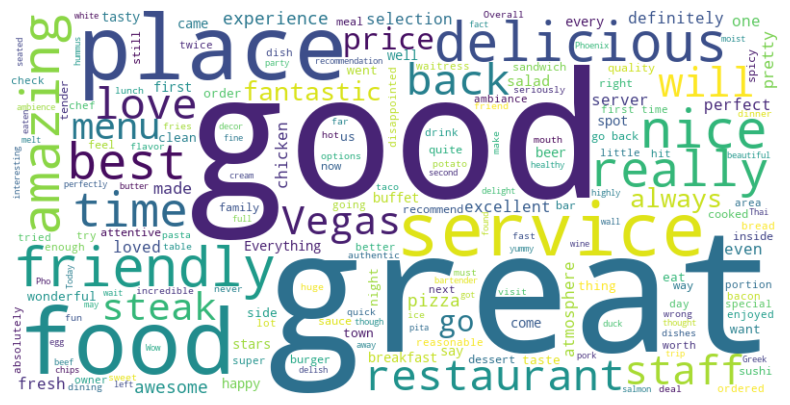

In [8]:
word_cloud=data.loc[data['Liked']==1,:]
text=' '.join([text for text in word_cloud['Review']])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off') # turns off the axis labels 
plt.show()

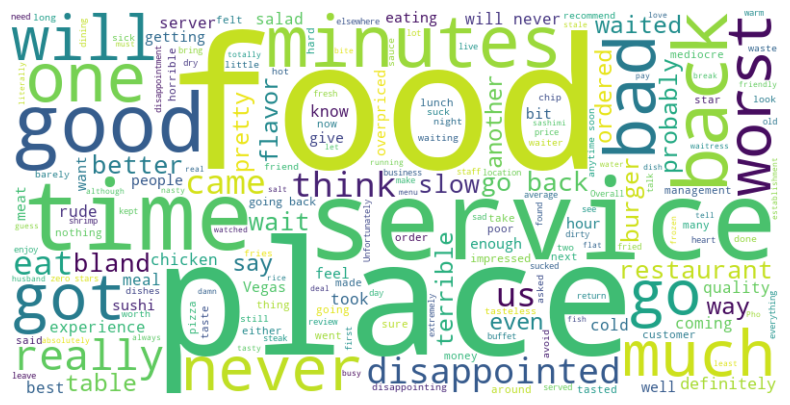

In [9]:
word_cloud=data.loc[data['Liked']==0,:]
text=' '.join([text for text in word_cloud['Review']])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer= CountVectorizer(max_df=0.9,min_df=10)
x=vectorizer.fit_transform(data['tokenized_review']).toarray()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data['tokenized_review'],data['Liked'],random_state=107,test_size=0.2)
X_train.head()

675                        fantastic neighborhood gem
561                               two felt disgusting
535    excellent new restaurant experienced Frenchman
266                                service par either
199                                       worth drive
Name: tokenized_review, dtype: object

In [16]:
train_vectorized=vectorizer.transform(X_train)
test_vectorized=vectorizer.transform(X_test)

In [18]:
X_train_array=train_vectorized.toarray()
X_test_array=test_vectorized.toarray()

In [19]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_array,Y_train)

GaussianNB()

In [ ]:
Y_train_preds_nb=nb.predict(X_train_array)
Y_test_preds_nb=nb.predict(X_test_array)
Y_test_preds_nb

In [ ]:
Y_test

In [24]:
pd.DataFrame({"actual_value":Y_test,"predicted_value":Y_test_preds_nb})

,actual_value,predicted_value
906,0,0
24,1,0
706,1,1
958,0,0
355,1,1
...,...,...
657,1,1
754,0,0
839,1,0
495,0,0


In [ ]:
# 1.17hr